In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
meas_df = pd.read_csv('./datasets/merge-1011.csv', sep=",")
corrM = meas_df.corr()
print('Covariance matrix :')
print(corrM.iloc[4::,0:4])

Covariance matrix :
           IR0_cam   IR1_cam   IR2_cam   IR3_cam
IR0_meas  0.114018 -0.944437  0.022174  0.560356
IR1_meas  0.773435 -0.008685 -0.861777  0.154347
IR2_meas -0.875817 -0.039410  0.804293 -0.032913
IR3_meas -0.105552  0.645334  0.179567 -0.807512


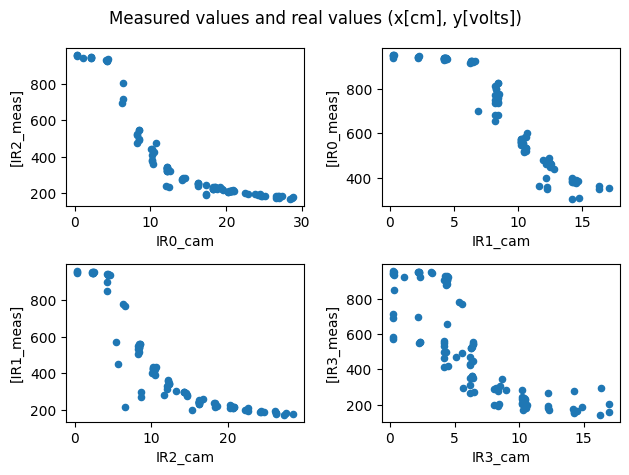

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Measured values and real values (x[cm], y[volts])')
meas_df.plot(ax=axes[0,0],x="IR0_cam", y=["IR2_meas"],kind ="scatter")
meas_df.plot(ax=axes[0,1],x="IR1_cam", y=["IR0_meas"],kind ="scatter")
meas_df.plot(ax=axes[1,0],x="IR2_cam", y=["IR1_meas"],kind ="scatter")
meas_df.plot(ax=axes[1,1],x="IR3_cam", y=["IR3_meas"],kind ="scatter")
plt.tight_layout()

# SKlearn MLP Regressor

Training and test dataset shapes:
(79, 1)
(20, 1)
(79, 1)
(20, 1)

R2 score: 0.938037155217408


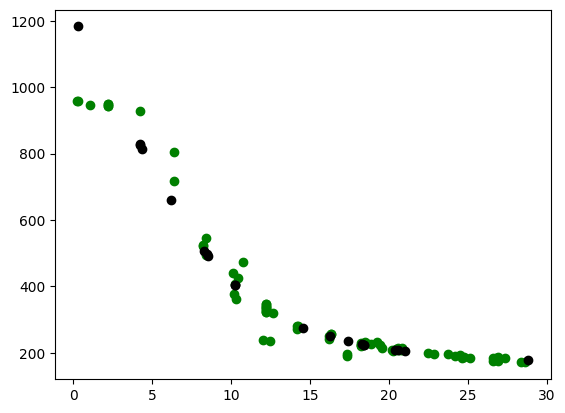

In [169]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

x = meas_df[['IR0_cam']].values
y = meas_df[['IR2_meas']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print("Training and test dataset shapes:")
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

# No idea what I'm doing with those parameters
mlp = MLPRegressor(hidden_layer_sizes=(100,100,500,200),max_iter = 200,solver = 'adam')

mlp.fit(X_train,np.ravel(y_train))

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

plt.scatter(X_train, y_train,color='g') 
plt.scatter(X_test, predict_test,color='k') 
print("\nR2 score:", metrics.r2_score(y_test, predict_test))